### Installing fastai

In [ ]:
!pip install fastai

### Installing fastcore and fastai

In [ ]:
!pip install --upgrade fastcore -q
!pip install --upgrade fastai -q

     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 194kB 5.3MB/s 


### Importing Fastai Package

In [ ]:
import fastai
from fastai.vision.all import *

In [ ]:
fastai.__version__

'2.1.5'

In [ ]:
#mounting google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read the .csv files
train = pd.read_csv('/content/drive/My Drive/TecX/Train.csv')
test = pd.read_csv('/content/drive/My Drive/TecX/Test.csv')
train_path = '/content/drive/My Drive/TecX/train_small/train_small'
test_path = '/content/drive/My Drive/TecX/test_small/test_small'

train.head()

,filename,ID,LABEL
0,train/VTYNBFTO.png,VTYNBFTO,1
1,train/GVVXXDOZ.png,GVVXXDOZ,0
2,train/PMRSQLXN.png,PMRSQLXN,0
3,train/JXISWDUU.png,JXISWDUU,1
4,train/JVWMAACC.png,JVWMAACC,1


In [ ]:

##I created another column to give me just the filenames with the "train/"
train["new_filenames"] = [(str(i) + ".png") for i in train["ID"]]

test["new_filenames"] = [(str(i) + ".png") for i in test["ID"]]

## Image Data Loading
Use the ImageDataLoader function in Fastai to load our image files, using the filenames gotten from our train dataframe
More info on the ImageDataLoader function: https://docs.fast.ai/tutorial.vision.html

In [ ]:

dls = ImageDataLoaders.from_df(train, path=train_path,

                               fn_col='new_filenames', ## Columns in dataframe containing filenames
                               label_col = 'LABEL', ## Column in dataframe containing label

                               item_tfms=Resize(460), ## Resizing 
                               seed = 42, ## Enable same set of validation images
                               batch_tfms=aug_transforms(size=224), ## Augmentation
                               valid_pct = 0.2)

## Note the path "../combined_images - Copy" to ease in dataloading with FASTAI I combined all the image files(train and test) into a single folder
## To select just the training set images, i just pass in the train dataframe containing file names for only the training images

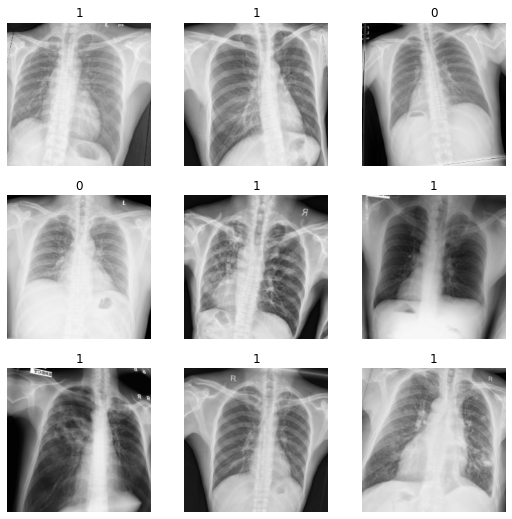

In [ ]:
## Give a preview of the images loaded
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, 
                    metrics=accuracy)

# resnet34, resnet50, resnet101, resnet152
# densenet121, densenet169, densenet201, densenet161

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


### Using Fastai "lr_find" method to get Optimal Learning Rate suggestions for our model

In [ ]:
learn.lr_find()

## Model Training


In [ ]:
# slice(1e-6, 1e-4)
learn.fine_tune(10, 0.141830)

epoch,train_loss,valid_loss,accuracy,time
0,1.818288,14.576705,0.440559,06:03


epoch,train_loss,valid_loss,accuracy,time
0,1.926996,2266.073486,0.580420,07:17
1,1.476504,982.500427,0.580420,07:18
2,1.323995,3445.364014,0.559441,07:17
3,1.616677,27.112635,0.454545,07:16
4,1.546297,73.544823,0.580420,07:15
5,1.442001,1.376262,0.573427,07:18
6,1.330617,4.350768,0.594406,07:40
7,1.251803,1.561764,0.601399,07:15
8,1.168045,0.577150,0.720280,07:29
9,1.072580,0.535886,0.713287,07:18


### Give a preview of random images and their true and predicted classes

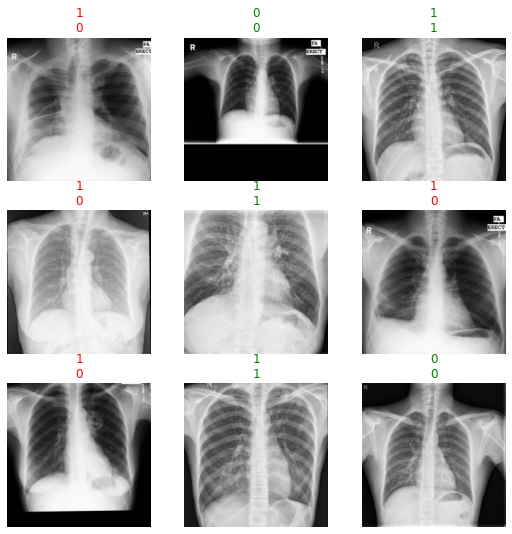

In [ ]:
learn.show_results()

## Predicting on the test images

In [ ]:
## All we need to do here is pass in the dataframe that contains the test image files "test"
test_dl=learn.dls.test_dl(test)

## We used "tta()" test-time-augmentation to predict, we can alternatively use "get_preds()" but "tta()" performs better
preds, _ = learn.tta(dl=test_dl)

In [ ]:
preds.numpy()[:10]

array([[0.71789145, 0.28210852],
       [0.6556132 , 0.34438685],
       [0.6163411 , 0.38365892],
       [0.6545764 , 0.34542364],
       [0.27119505, 0.72880495],
       [0.22761476, 0.77238524],
       [0.6926228 , 0.30737722],
       [0.6553041 , 0.34469587],
       [0.5897046 , 0.41029537],
       [0.34203485, 0.6579651 ]], dtype=float32)

## Creating our Submission File

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/TecX/SampleSubmission.csv')
ss['LABEL'] = preds.numpy()[:, 1]
filename = "fastai.csv"
ss.to_csv(filename, index = False)